#### EDA 

In [4]:
import pandas as pd
import string
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sujaydeevela/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Reading the csv file 
data = pd.read_csv('gofundmeus.csv').iloc[:,1:]
# Displaying the first 5 rows of the data.
data.head()

title raised_amount  \
0  Crystal’s Birthday Wish - Belize Mission’s Tri...           180   
1                                 Get Beryl to Maine           725   
2              Running for Change: Every Step Counts           440   
3                    Help Maryam family reach safety         2,281   
4        Support for Robert McNerney's Funeral Costs         7,430   

   goal_amount                    date_span  \
0         1700  Created September 2nd, 2024   
1          500              Created 5 d ago   
2         1000  Created September 9th, 2024   
3        30000  Created September 9th, 2024   
4        15000  Created September 9th, 2024   

                                               story no_of_donations  \
0  The older I get, the more I realize that we ar...               4   
1  Asking for help... $10 from 50 people to get B...              23   
2  Hi, my name is Karlee Sue!This Thanksgiving I’...               7   
3  My name is Yusra, a 40 year-old Palestinian li...             117   
4  **PLEASE NOTE: UPDATED CALLING HOURS ARE 10:30...              54   

                                           image_url          organizer  \
0  https://images.gofundme.com/uEekIFkAY1BJCoL-DU...  Crystal Witherell   
1  https://images.gofundme.com/M-BnG_r_dO1C9PG8Qu...     Noreen Goldner   
2  https://images.gofundme.com/4kHkvSXNwP2maxslwd...     Karlee Siperko   
3  https://images.gofundme.com/jIk3PqXTfGhwFJPsOd...               I PB   
4  https://images.gofundme.com/JprePUx9tJ9ZFKR-MI...      Paul McNerney   

               location                                      campaign_link  \
0       Brooksville, FL  https://www.gofundme.com//f/crystals-birthday-...   
1           Burbank, CA  https://www.gofundme.com//f/get-beryl-to-maine...   
2       Springfield, MO  https://www.gofundme.com//f/running-for-change...   
3    Virginia Beach, VA  https://www.gofundme.com//f/helpmaryamfamily?q...   
4  Stafford Springs, CT  https://www.gofundme.com//f/support-for-robert...   

               category  
0  volunteer-fundraiser  
1     animal-fundraiser  
2  volunteer-fundraiser  
3  emergency-fundraiser  
4   memorial-fundraiser

In [4]:
data.shape

(8053, 11)

The data has 8053 rows and 11 columns.

In [3]:
# Checking if there are any null values in each column
data.isnull().any()

title               True
raised_amount      False
goal_amount        False
date_span          False
story               True
no_of_donations    False
image_url          False
organizer          False
location            True
campaign_link      False
category           False
dtype: bool

There are null values in title, story, location columns.

In [5]:
# Dropping all the rows which has null values. 
data.dropna(axis=0,inplace=True)

In [6]:
# Confirming if the null values have been removed.
data.isnull().any()

title              False
raised_amount      False
goal_amount        False
date_span          False
story              False
no_of_donations    False
image_url          False
organizer          False
location           False
campaign_link      False
category           False
dtype: bool

As we can see that all the null values have been removed.

In [7]:
data.shape

(7647, 11)

After removing null rows, the dataset has been reduced to 7647 rows and 11 columns.

In [8]:
data.head()

title raised_amount  \
0  Crystal’s Birthday Wish - Belize Mission’s Tri...           180   
1                                 Get Beryl to Maine           725   
2              Running for Change: Every Step Counts           440   
3                    Help Maryam family reach safety         2,281   
4        Support for Robert McNerney's Funeral Costs         7,430   

   goal_amount                    date_span  \
0         1700  Created September 2nd, 2024   
1          500              Created 5 d ago   
2         1000  Created September 9th, 2024   
3        30000  Created September 9th, 2024   
4        15000  Created September 9th, 2024   

                                               story no_of_donations  \
0  The older I get, the more I realize that we ar...               4   
1  Asking for help... $10 from 50 people to get B...              23   
2  Hi, my name is Karlee Sue!This Thanksgiving I’...               7   
3  My name is Yusra, a 40 year-old Palestinian li...             117   
4  **PLEASE NOTE: UPDATED CALLING HOURS ARE 10:30...              54   

                                           image_url          organizer  \
0  https://images.gofundme.com/uEekIFkAY1BJCoL-DU...  Crystal Witherell   
1  https://images.gofundme.com/M-BnG_r_dO1C9PG8Qu...     Noreen Goldner   
2  https://images.gofundme.com/4kHkvSXNwP2maxslwd...     Karlee Siperko   
3  https://images.gofundme.com/jIk3PqXTfGhwFJPsOd...               I PB   
4  https://images.gofundme.com/JprePUx9tJ9ZFKR-MI...      Paul McNerney   

               location                                      campaign_link  \
0       Brooksville, FL  https://www.gofundme.com//f/crystals-birthday-...   
1           Burbank, CA  https://www.gofundme.com//f/get-beryl-to-maine...   
2       Springfield, MO  https://www.gofundme.com//f/running-for-change...   
3    Virginia Beach, VA  https://www.gofundme.com//f/helpmaryamfamily?q...   
4  Stafford Springs, CT  https://www.gofundme.com//f/support-for-robert...   

               category  
0  volunteer-fundraiser  
1     animal-fundraiser  
2  volunteer-fundraiser  
3  emergency-fundraiser  
4   memorial-fundraiser

In [19]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=bdb73472a4455bfbe79a00561c562fe08d48f9732f810d98de09fc4624f4649b
  Stored in directory: /Users/sujaydeevela/Library/Caches/pip/wheels/60/b3/27/d8aff3e2d5c2d0d97a117cdf0d5f13cd121e2c2b5fb49b55a0
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.

In [22]:
!pip install contractions
from tqdm import tqdm
import contractions
from googletrans import Translator
import matplotlib.ticker as mticker
tqdm.pandas()
translator = Translator()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00a 0:00:01


In [91]:
# Function to remove emojis
def remove_emojis(text):
    # Regex pattern to match all emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # miscellaneous symbols
        u"\U000024C2-\U0001F251"  # enclosed characters
        "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r' ', text)

In [92]:
def translate_to_english(text):
    try:
        detected_lang = translator.detect(text).lang
        # Detect the language and translate to English
        if detected_lang != 'en':
            translated = translator.translate(text, dest='en')
            return translated.text
        else:
            return text
    except Exception as e:
        return text  # Return original text if translation fails

In [96]:
stop_words = set(stopwords.words('english'))

def text_processing(sentence):
    
    # Translate the text
    sentence = translate_to_english(sentence)
    # Remove emojis
    sentence = remove_emojis(sentence)
    # Expand contractions 
    sentence = contractions.fix(sentence)
    # Convert to lowercase
    sentence = sentence.lower()
    # Remove punctuation
    sentence = re.sub(r'[{}]+'.format(re.escape(string.punctuation)), ' ', sentence)
    # Remove numbers
    sentence = re.sub(r'\d+', '', sentence)
    # Remove extra whitespaces
    sentence = re.sub(r'\s+', ' ', sentence).strip()
    sentence = sentence.replace('…','')
    # Remove stopwords
    cleaned_text = ' '.join(word for word in sentence.split() if word not in stop_words)
    
    return cleaned_text

In [97]:
# Creating a copy of dataframe.
processed_data  = data.copy() 

In [98]:
# Applying the text_processing function to the story column
processed_data['story'] = data['story'].progress_apply(lambda x:text_processing(x))

100%|██████████████████████████████████████████████████████████████████████████████| 7647/7647 [49:09<00:00,  2.59it/s]


In [126]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create word clouds for each category using subplots
def create_wordclouds(data):
    categories = list(data['category'].unique())  # Get unique categories
    #num_categories = len(categories)
    
    # Create subplots
    fig, axes = plt.subplots(6, 3, figsize=(30, 25))
    
    for ax, category in tqdm(zip(axes.flatten(), categories)):
        # Combine all text for the current category
        text = ' '.join(data[data['category'] == category]['story'])
        # Create a word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        # Plot the word cloud
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')  # Turn off axis
        ax.set_title(f'Word Cloud for Category: {category}', fontsize=20)

    plt.tight_layout()  # Adjust layout
    plt.show()
    
    return None

18it [00:30,  1.70s/it]


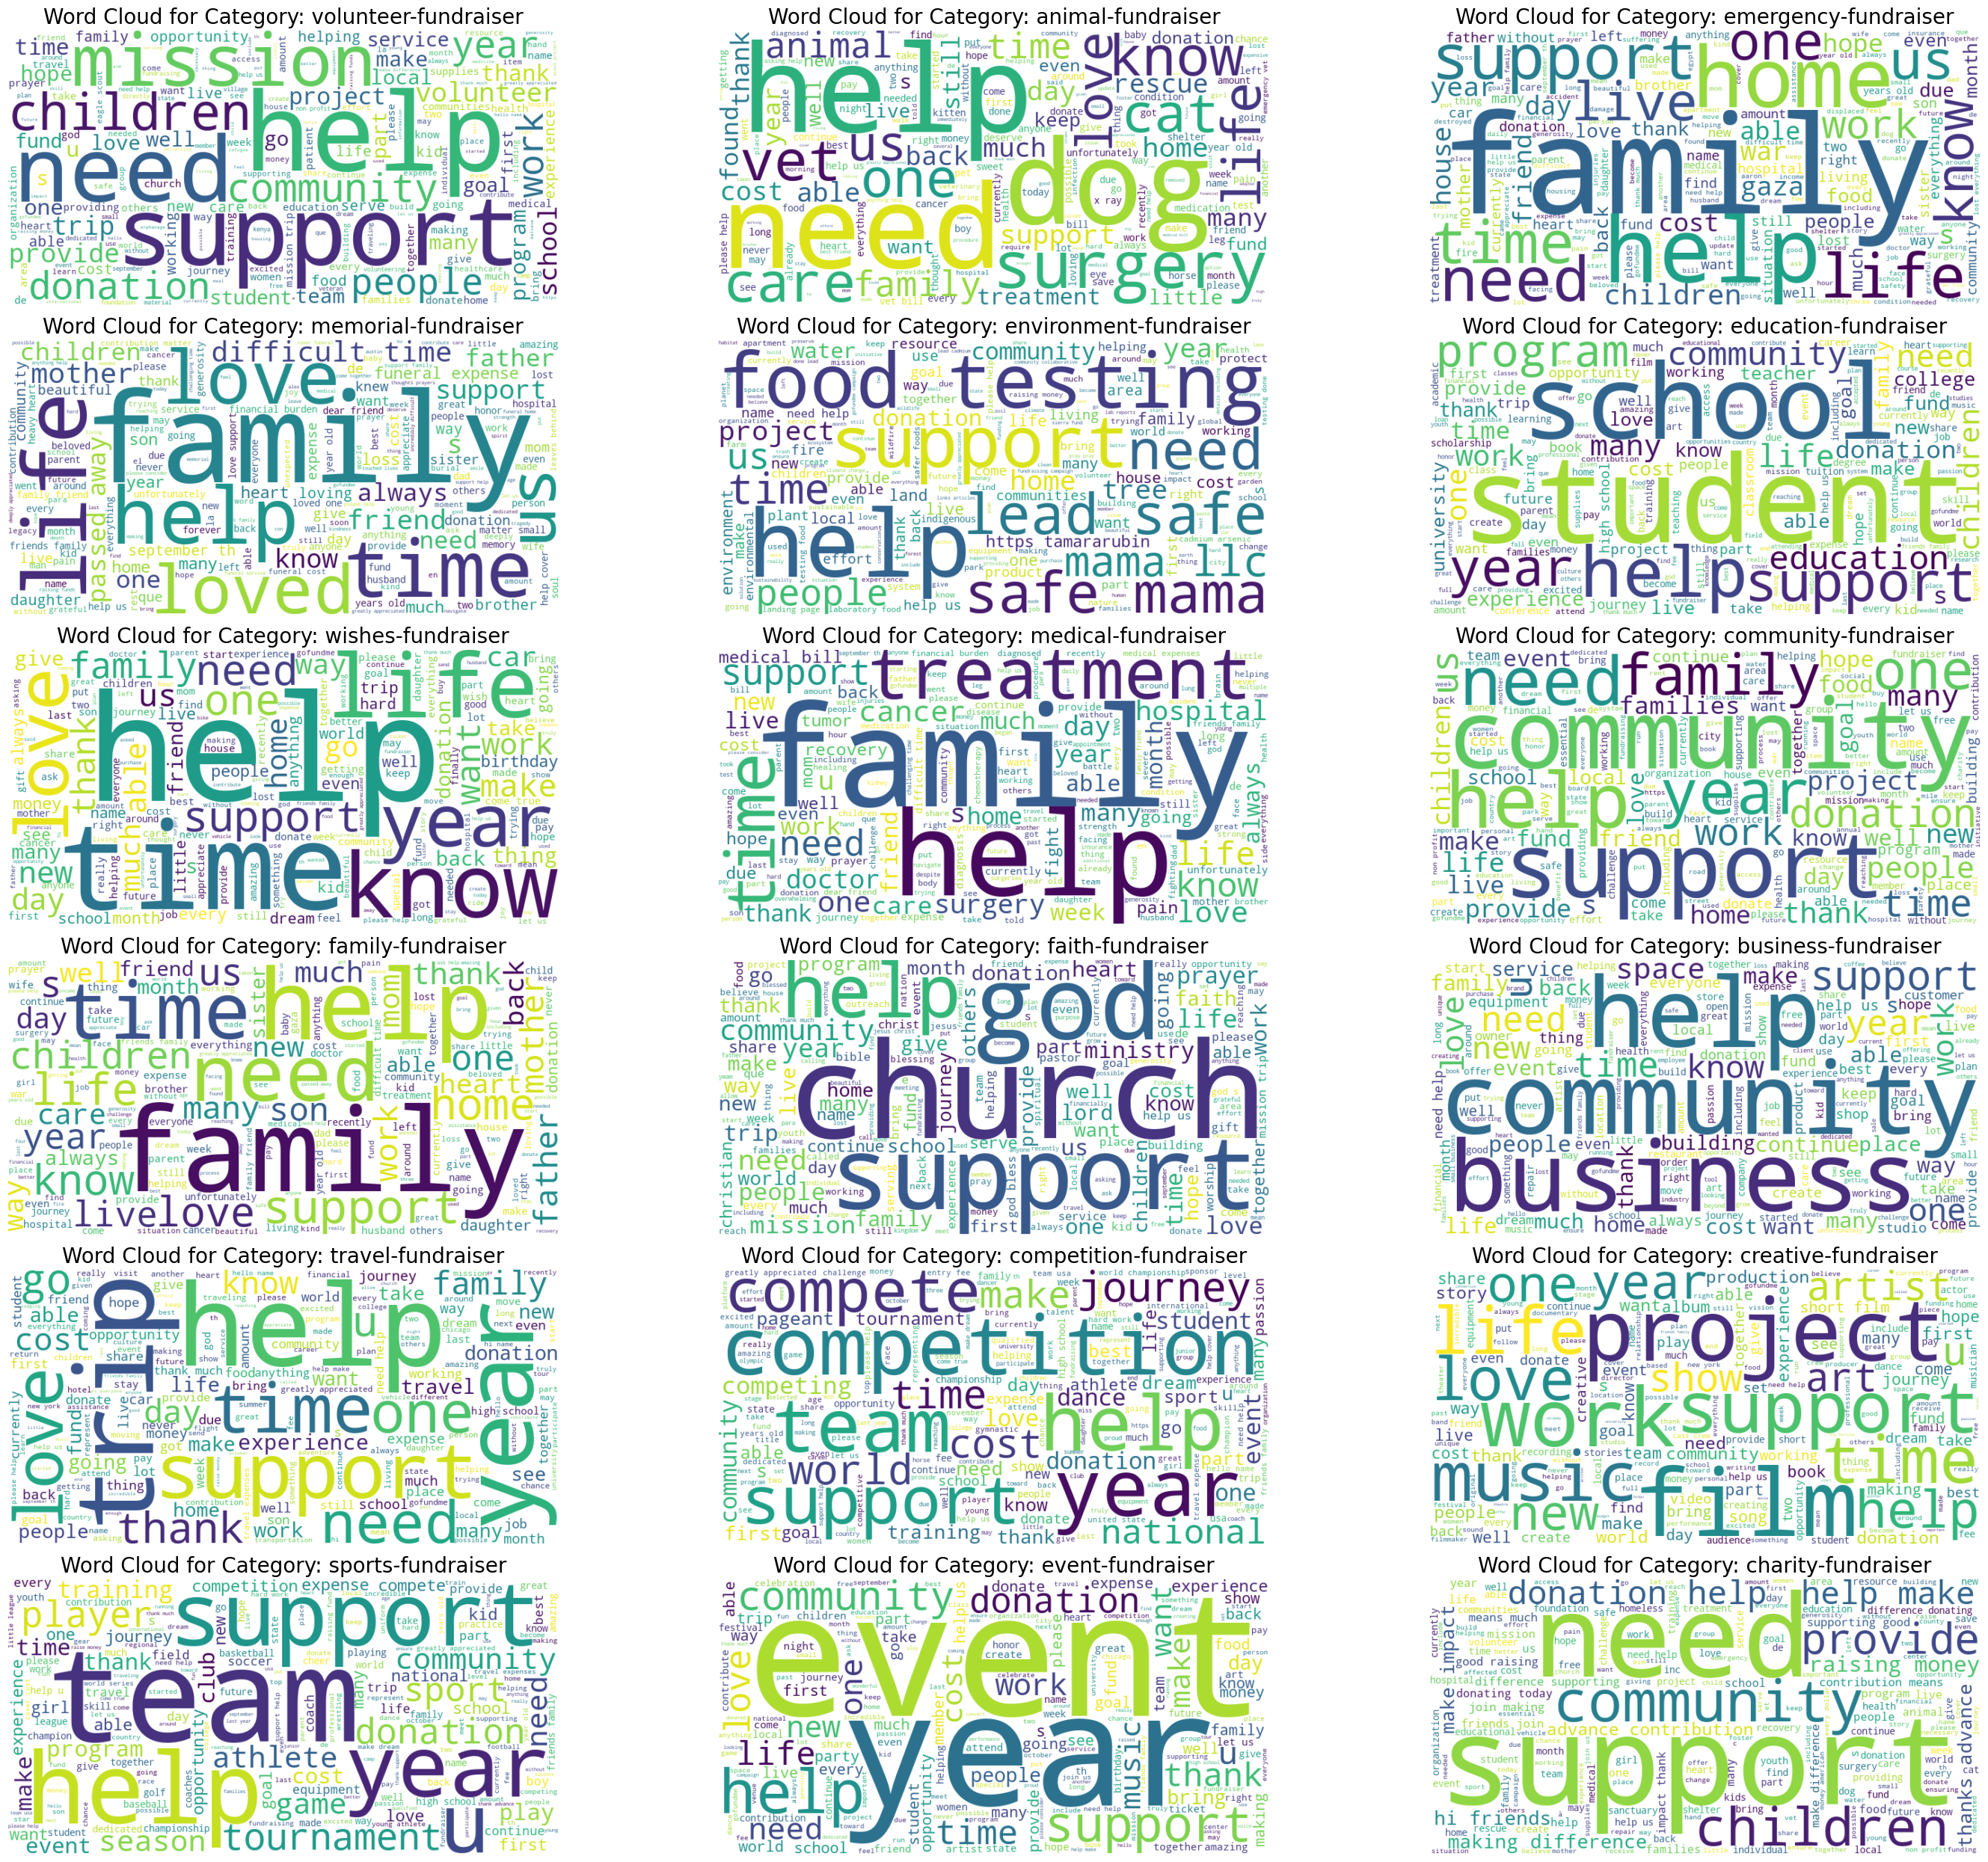

In [127]:
# Generate word clouds for each category
create_wordclouds(processed_data)

In [265]:
processed_data['title'] = processed_data['title'].progress_apply(lambda x: text_processing(x))

100%|████████████████████████████████████████████████████████████████████████████| 7647/7647 [1:31:23<00:00,  1.39it/s]


In [2]:
# Saving the processed data in a csv file 
processed_data.to_csv('processed_data.csv',index=False)

NameError: name 'processed_data' is not defined

In [47]:
clean_data = pd.read_csv('processed_data.csv')
clean_data.head()

title raised_amount  goal_amount  \
0  crystal’s birthday wish belize mission’s trip           180         1700   
1                                get beryl maine           725          500   
2               running change every step counts           440         1000   
3                help maryam family reach safety         2,281        30000   
4          support robert mcnerney funeral costs         7,430        15000   

                     date_span  \
0  Created September 2nd, 2024   
1              Created 5 d ago   
2  Created September 9th, 2024   
3  Created September 9th, 2024   
4  Created September 9th, 2024   

                                               story no_of_donations  \
0  older get realize earth share light love other...               4   
1  asking help people get beryl maine months east...              23   
2  hi name karlee sue thanksgiving thrilled parti...               7   
3  name yusra year old palestinian living gaza st...             117   
4  please note updated calling hours pm father ro...              54   

                                           image_url          organizer  \
0  https://images.gofundme.com/uEekIFkAY1BJCoL-DU...  Crystal Witherell   
1  https://images.gofundme.com/M-BnG_r_dO1C9PG8Qu...     Noreen Goldner   
2  https://images.gofundme.com/4kHkvSXNwP2maxslwd...     Karlee Siperko   
3  https://images.gofundme.com/jIk3PqXTfGhwFJPsOd...               I PB   
4  https://images.gofundme.com/JprePUx9tJ9ZFKR-MI...      Paul McNerney   

               location                                      campaign_link  \
0       Brooksville, FL  https://www.gofundme.com//f/crystals-birthday-...   
1           Burbank, CA  https://www.gofundme.com//f/get-beryl-to-maine...   
2       Springfield, MO  https://www.gofundme.com//f/running-for-change...   
3    Virginia Beach, VA  https://www.gofundme.com//f/helpmaryamfamily?q...   
4  Stafford Springs, CT  https://www.gofundme.com//f/support-for-robert...   

               category  
0  volunteer-fundraiser  
1     animal-fundraiser  
2  volunteer-fundraiser  
3  emergency-fundraiser  
4   memorial-fundraiser

In [48]:
#clean_data['state'] = clean_data['location'].progress_apply(lambda x: x.split(',')[-1])
from tqdm import tqdm
tqdm.pandas()  # Activate the progress bar

# Apply the function with a progress bar on a Series
clean_data['state'] = clean_data['location'].progress_apply(lambda x: x.split(',')[-1])


100%|███████████████████████████████████| 7647/7647 [00:00<00:00, 410445.37it/s]


In [49]:
#Splitting date_span column.
date_strings=clean_data["date_span"]

In [50]:
from datetime import datetime
import re
from datetime import timedelta

In [51]:
 #Manually set datetime to September 21, 2024
extracted_date = datetime(2024, 9, 21)

dates = []

# Function to clean ordinal suffixes from date strings
def remove_ordinal_suffix(date_str):
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)


# Loop through date strings
for date_str in date_strings:
    # Remove 'Created ' prefix
    clean_str = date_str.replace("Created ", "").strip()
    
    # Handle relative dates (e.g., "2 d ago" or "3 hrs ago")
    if 'ago' in clean_str:
        time_parts = clean_str.split()
        time_value = int(time_parts[0])
        time_unit = time_parts[1]  # e.g., "d" or "hrs"
        
        if 'd' in time_unit:
            date = extracted_date - timedelta(days=time_value)
        elif 'hr' in time_unit:
            date = extracted_date - timedelta(hours=time_value)
        elif 'min' in time_unit:
            date = extracted_date - timedelta(minutes=time_value)
        else:
            continue  # Skip unrecognized formats
    else:
        # Remove ordinal suffixes for absolute dates (e.g., "September 2nd, 2024")
        clean_str = remove_ordinal_suffix(clean_str)
        # Convert to a datetime object
        date = datetime.strptime(clean_str, "%B %d, %Y")
    
    # Append only the date part (without time)
    dates.append(date.date())

# Print the converted dates
for date in dates:
    print(date.strftime("%Y-%m-%d"))

2024-09-02
2024-09-16
2024-09-09
2024-09-09
2024-09-09
2024-09-18
2024-08-15
2024-09-05
2024-09-16
2024-08-28
2024-09-19
2024-09-19
2024-09-18
2024-06-24
2024-09-20
2024-08-10
2024-09-19
2024-09-03
2024-07-26
2024-09-10
2024-08-22
2024-09-11
2024-07-30
2024-07-09
2024-09-06
2024-06-26
2024-09-06
2024-09-03
2024-07-25
2024-08-07
2024-09-05
2024-09-13
2024-07-20
2024-08-06
2024-09-13
2024-09-03
2024-09-08
2024-08-22
2024-09-01
2024-08-11
2024-08-02
2024-07-28
2024-09-09
2024-08-26
2024-09-17
2024-09-16
2024-08-25
2024-09-20
2024-09-20
2024-09-18
2024-09-10
2024-09-19
2024-09-02
2024-09-17
2024-08-15
2024-07-16
2024-08-26
2024-09-09
2024-07-13
2024-09-15
2024-07-22
2024-06-24
2024-08-01
2024-09-02
2024-07-09
2024-08-21
2024-09-08
2024-08-26
2024-09-06
2024-08-01
2024-08-19
2024-09-16
2024-07-17
2024-06-27
2024-09-06
2024-09-19
2024-07-12
2024-07-27
2024-07-02
2024-09-16
2024-09-06
2024-09-10
2024-09-03
2024-07-09
2024-09-19
2024-09-07
2024-09-07
2024-07-23
2024-07-30
2024-09-16
2024-07-09

In [52]:
clean_data["start_date"]=dates

In [53]:
# Convert the 'dates' column to datetime
clean_data['start_date'] = pd.to_datetime(clean_data['start_date'])

# Extract the day of the week and create a new column
clean_data['day_of_week'] = clean_data['start_date'].dt.day_name()


In [54]:
clean_data=clean_data.drop(["date_span"],axis=1)

In [55]:
# Calculate duration from now
clean_data['campaign_duration'] = datetime.now() - clean_data['start_date']

# Convert duration to days (or any other time unit)
clean_data['campaign_duration'] = clean_data['campaign_duration'].dt.days

In [56]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7647 entries, 0 to 7646
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              7647 non-null   object        
 1   raised_amount      7647 non-null   object        
 2   goal_amount        7647 non-null   int64         
 3   story              7647 non-null   object        
 4   no_of_donations    7647 non-null   object        
 5   image_url          7647 non-null   object        
 6   organizer          7647 non-null   object        
 7   location           7647 non-null   object        
 8   campaign_link      7647 non-null   object        
 9   category           7647 non-null   object        
 10  state              7647 non-null   object        
 11  start_date         7647 non-null   datetime64[ns]
 12  day_of_week        7647 non-null   object        
 13  campaign_duration  7647 non-null   int64         
dtypes: datet

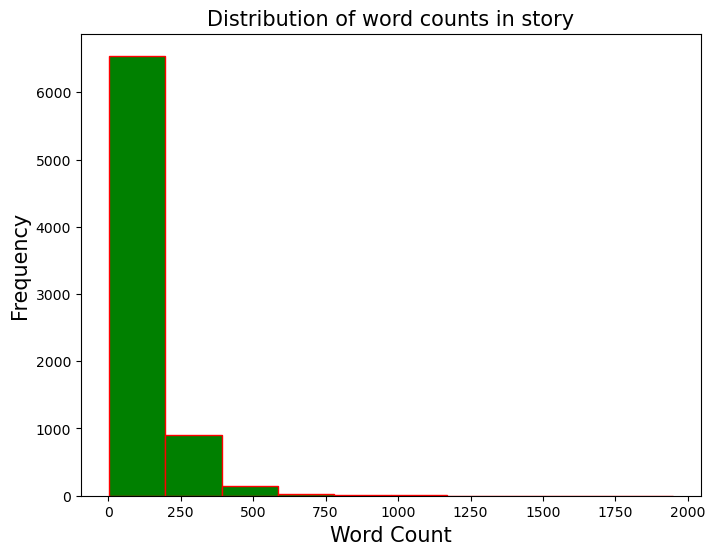

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
ax = clean_data['story'].str.split().str.len().plot(kind='hist',edgecolor='red',color='green')
plt.xlabel('Word Count',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of word counts in story',fontsize=15)
plt.show()

In [58]:
clean_data['raised_amount'] = clean_data['raised_amount'].str.replace(',', '')

In [59]:
def convert_shortform(value):
    value = value.upper().strip()  # Convert to uppercase and remove leading/trailing spaces
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    else:
        return pd.to_numeric(value, errors='coerce')

In [60]:
clean_data['no_of_donations'] = clean_data['no_of_donations'].progress_apply(lambda x: convert_shortform(x))

100%|████████████████████████████████████| 7647/7647 [00:00<00:00, 71532.72it/s]


In [61]:
clean_data['raised_amount'] = pd.to_numeric(clean_data['raised_amount'])
clean_data['goal_amount'] = pd.to_numeric(clean_data['goal_amount'])
clean_data['no_of_donations'] = pd.to_numeric(clean_data['no_of_donations'])

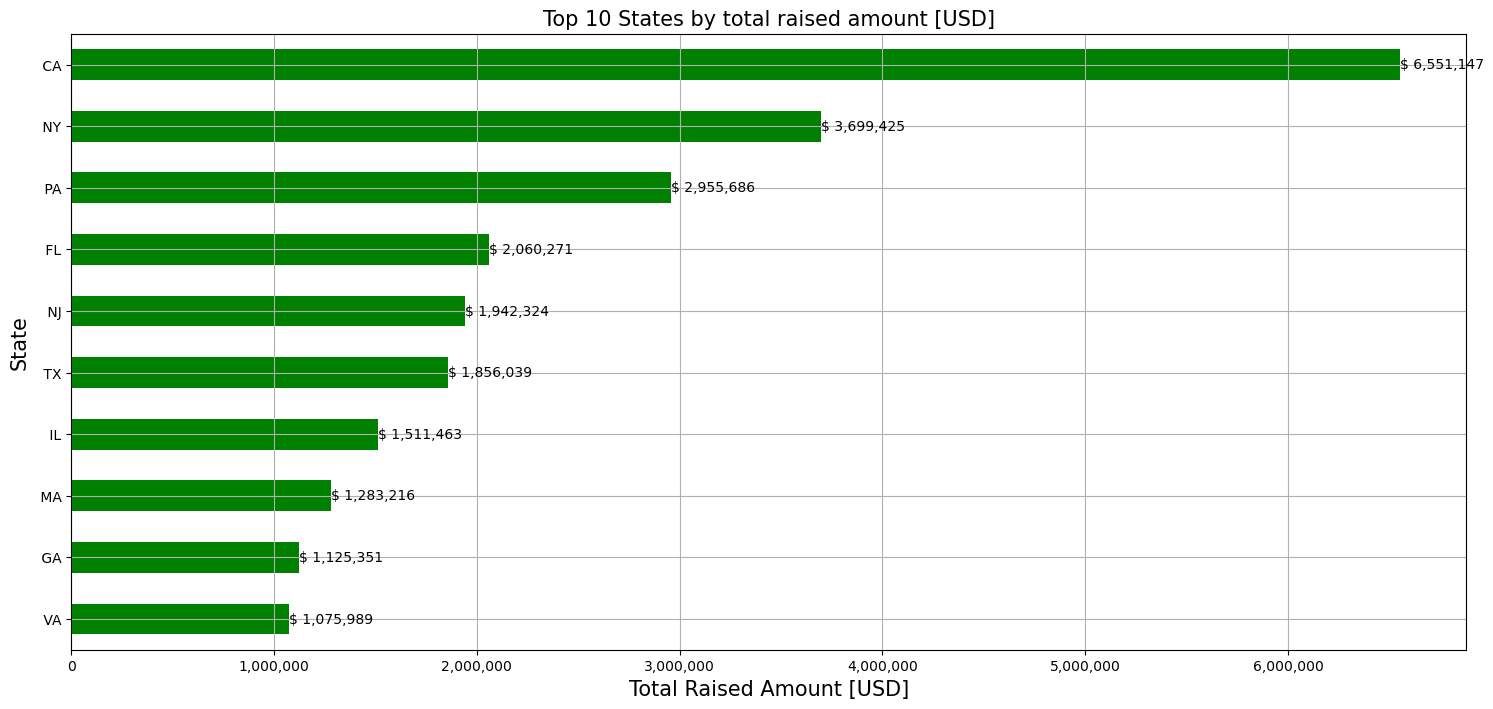

In [62]:
plt.figure(figsize=(18,8))
top_10_states  = clean_data.groupby('state')['raised_amount'].sum().sort_values(ascending=False).head(10)
ax = top_10_states.plot(kind='barh',color='green')
plt.xlabel('Total Raised Amount [USD]',fontsize=15)
plt.ylabel('State',fontsize=15)
plt.title('Top 10 States by total raised amount [USD]',fontsize=15)

formatter = mticker.FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

for container in ax.containers:
    ax.bar_label(container, labels=[f'$ {int(v):,}' for v in container.datavalues])

plt.gca().invert_yaxis()
plt.grid('--')
plt.show()

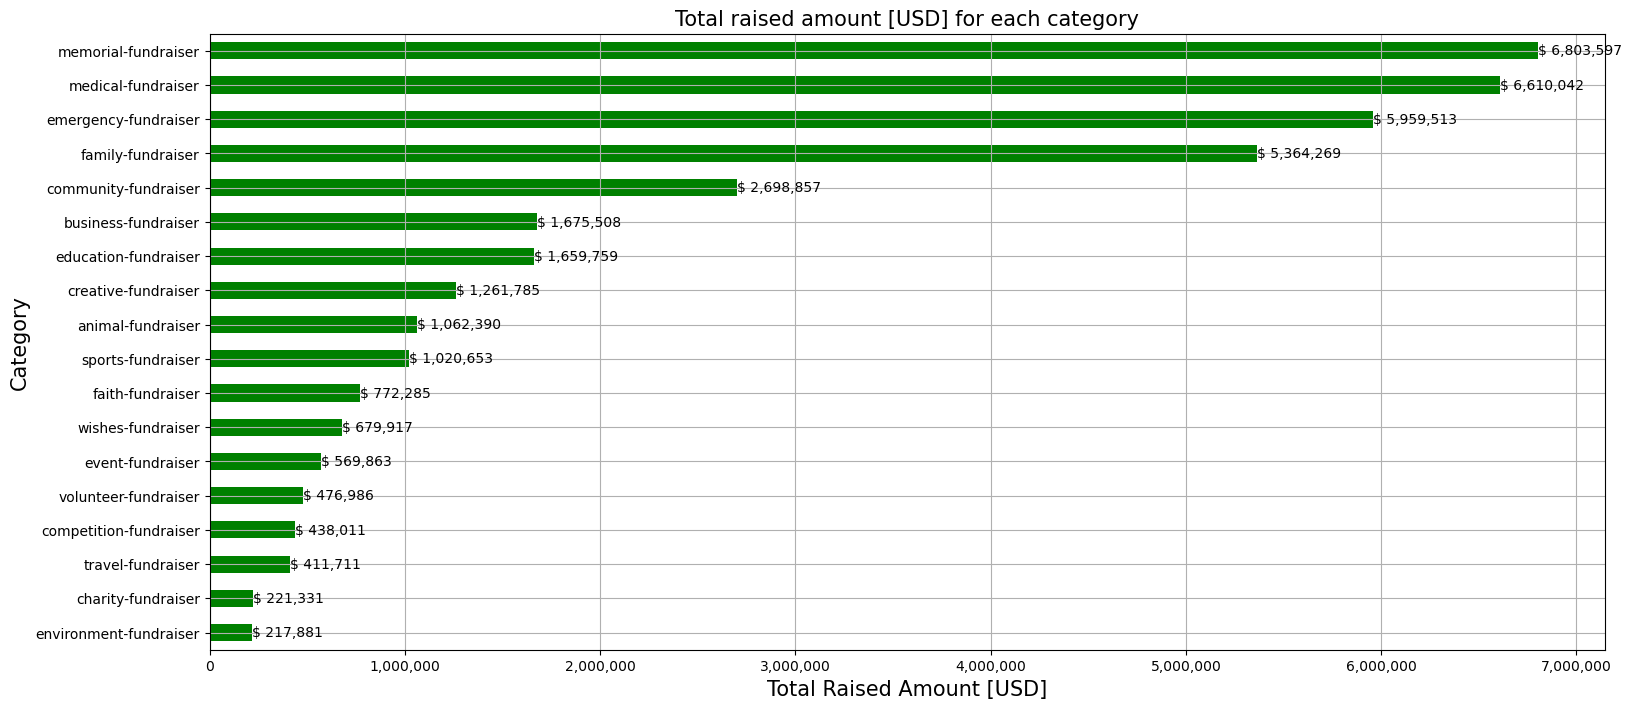

In [63]:
plt.figure(figsize=(18,8))
ax = clean_data.groupby('category')['raised_amount'].sum().sort_values(ascending=False)\
     .plot(kind='barh',color='green')

plt.xlabel('Total Raised Amount [USD]',fontsize=15)
plt.ylabel('Category',fontsize=15)
plt.title('Total raised amount [USD] for each category',fontsize=15)
formatter = mticker.FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

for container in ax.containers:
    ax.bar_label(container, labels=[f'$ {int(v):,}' for v in container.datavalues])

plt.gca().invert_yaxis()
plt.grid('--')
plt.show()

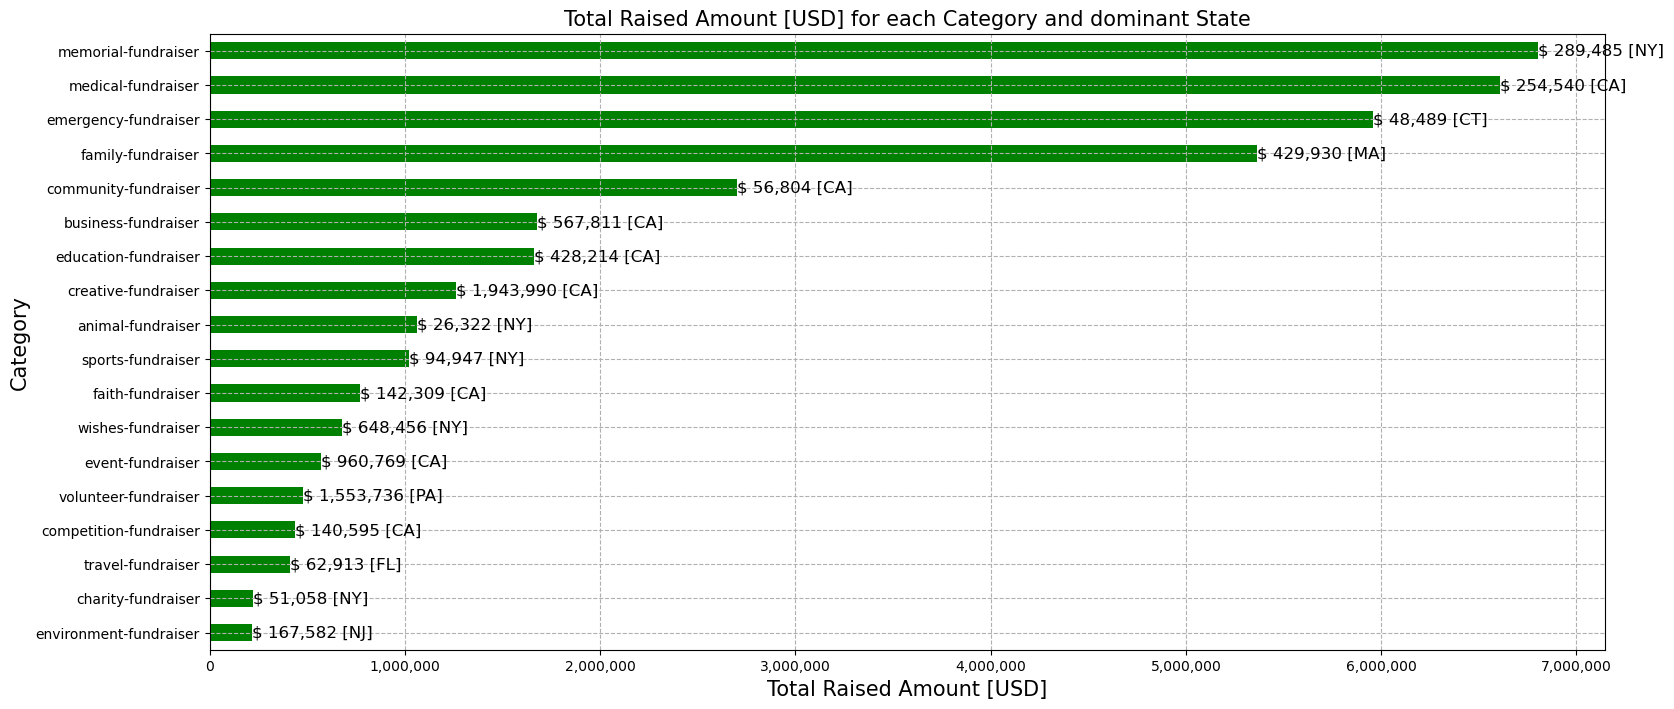

In [64]:
# Find the dominant state for each category

category_amount = clean_data.groupby('category')['raised_amount'].sum().\
    sort_values(ascending=False).reset_index().\
    rename(columns={'raised_amount':'total_raised_amount'})

top_state    = clean_data.groupby(['category', 'state'])['raised_amount'].sum()\
    .reset_index().sort_values('raised_amount', ascending=False)\
    .groupby('category').first().reset_index()

result = pd.merge(category_amount, top_state, on='category', how='right')[top_state.columns]
result.set_index('category').reindex(index=['category']).reset_index()

result['state'] = result['state'].str.strip()

# Plot the total raised amount for each category
plt.figure(figsize=(18, 8))
ax = category_amount.plot(kind='barh', x='category', y='total_raised_amount', color='green', legend=False, ax=plt.gca())

# Add the dominant state as a label next to the raised amount
for i, container in enumerate(ax.containers):
    # Custom labels that include both raised amount and dominant state
    labels = [f"$ {int(result.loc[i, 'raised_amount']):,} [{result.loc[i, 'state']}]" for i in range(len(result))]
    ax.bar_label(container, labels=labels, fontsize=12)

# Add labels and title
plt.xlabel('Total Raised Amount [USD]', fontsize=15)
plt.ylabel('Category', fontsize=15)
plt.title('Total Raised Amount [USD] for each Category and dominant State', fontsize=15)

# Format the x-axis to show commas instead of scientific notation
formatter = mticker.FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

# Invert the y-axis to have the highest value at the top
plt.gca().invert_yaxis()

# Add a grid
plt.grid(True, linestyle='--')

# Show the plot
plt.show()

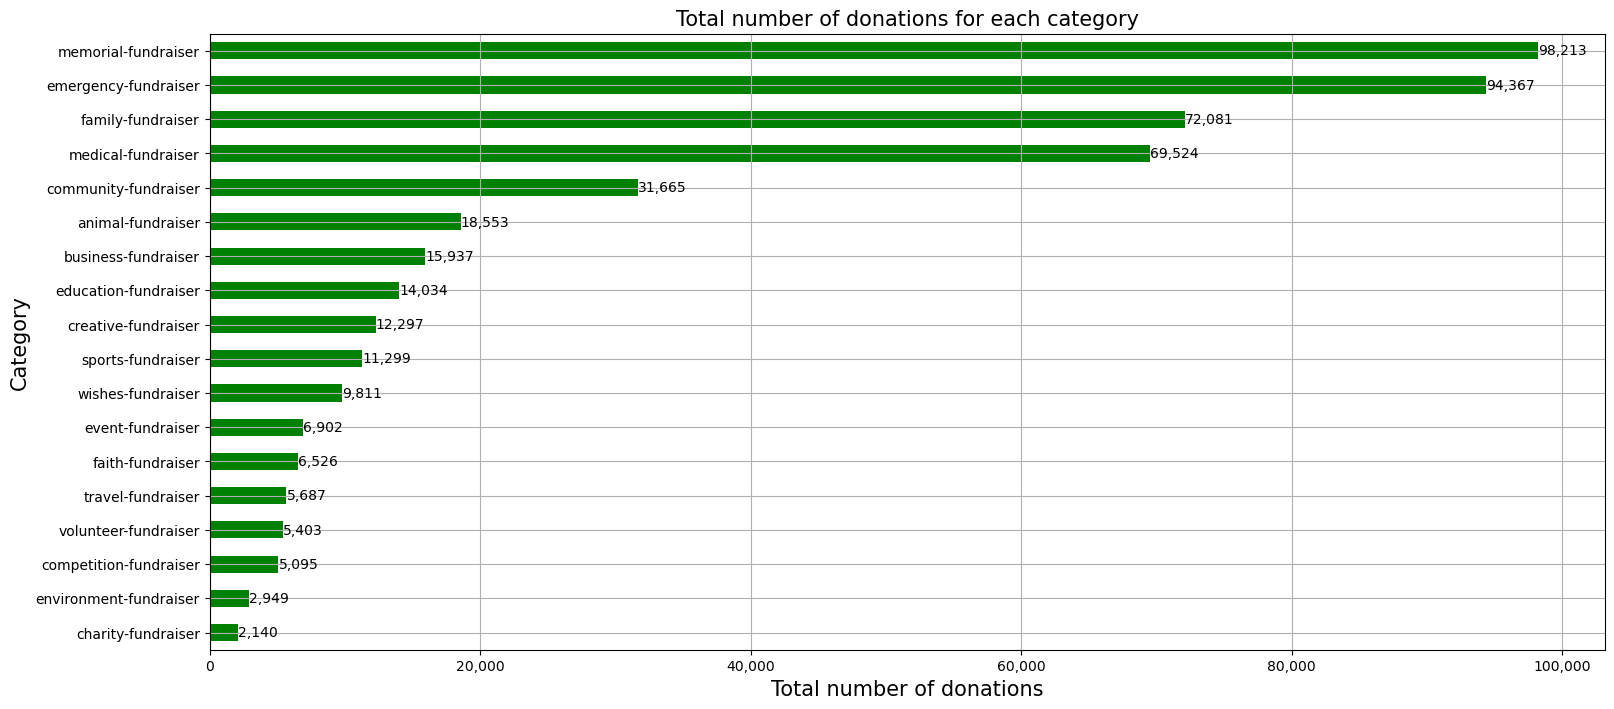

In [65]:
plt.figure(figsize=(18,8))
ax = clean_data.groupby('category')['no_of_donations'].sum().sort_values(ascending=False)\
     .plot(kind='barh',color='green')

plt.xlabel('Total number of donations',fontsize=15)
plt.ylabel('Category',fontsize=15)
plt.title('Total number of donations for each category',fontsize=15)
formatter = mticker.FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(v):,}' for v in container.datavalues])

plt.gca().invert_yaxis()
plt.grid('--')
plt.show()

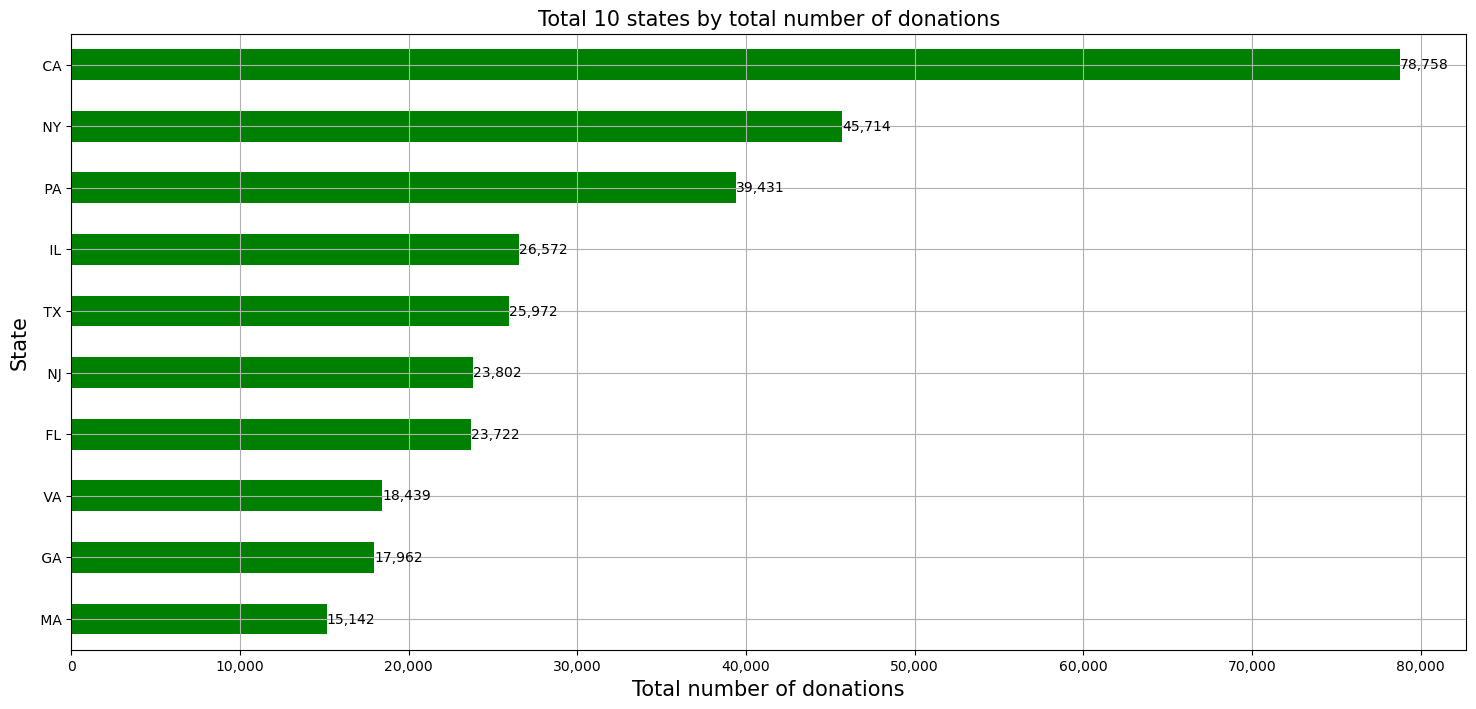

In [66]:
plt.figure(figsize=(18,8))
ax = clean_data.groupby('state')['no_of_donations'].sum().sort_values(ascending=False).head(10)\
     .plot(kind='barh',color='green')

plt.xlabel('Total number of donations',fontsize=15)
plt.ylabel('State',fontsize=15)
plt.title('Total 10 states by total number of donations',fontsize=15)
formatter = mticker.FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(v):,}' for v in container.datavalues])

plt.gca().invert_yaxis()
plt.grid('--')
plt.show()

In [67]:
# Descriptive stats
clean_data.describe()

raised_amount   goal_amount  no_of_donations  campaign_duration
count   7.647000e+03  7.647000e+03      7647.000000        7647.000000
mean    4.956762e+03  7.814548e+05        63.094416          34.395972
std     2.629157e+04  2.625114e+07       453.003942          45.782682
min     0.000000e+00  1.000000e+00         0.000000           5.000000
25%     3.000000e+02  2.000000e+03         6.000000          11.000000
50%     1.050000e+03  5.000000e+03        15.000000          23.000000
75%     3.225000e+03  1.200000e+04        38.000000          54.000000
max     1.382661e+06  1.000000e+09     23400.000000        2397.000000

In [73]:
from tabulate import tabulate
# Calculate Central Tendencies
central_tendencies = {
    'Measure': ['Mean', 'Median', 'Mode'],
    'Raised Amount': [
        round(clean_data['raised_amount'].mean(), 2),
        round(clean_data['raised_amount'].median(), 2),
        round(clean_data['raised_amount'].mode()[0], 2),
    ],
    'Goal Amount': [
        round(clean_data['goal_amount'].mean(), 2),
        round(clean_data['goal_amount'].median(), 2),
        round(clean_data['goal_amount'].mode()[0], 2),
    ],
    'Number of Donations': [
        round(clean_data['no_of_donations'].mean(), 2),
        round(clean_data['no_of_donations'].median(), 2),
        round(clean_data['no_of_donations'].mode()[0], 2),
    ]
}

# Calculate Dispersion Metrics
dispersion_metrics = {
    'Measure': ['Variance', 'Standard Deviation', 'Skewness', 'Kurtosis'],
    'Raised Amount': [
        round(clean_data['raised_amount'].var(), 2),
        round(clean_data['raised_amount'].std(), 2),
        round(clean_data['raised_amount'].skew(), 2),
        round(clean_data['raised_amount'].kurt(), 2),
    ],
    'Goal Amount': [
        round(clean_data['goal_amount'].var(), 2),
        round(clean_data['goal_amount'].std(), 2),
        round(clean_data['goal_amount'].skew(), 2),
        round(clean_data['goal_amount'].kurt(), 2),
    ],
    'Number of Donations': [
        round(clean_data['no_of_donations'].var(), 2),
        round(clean_data['no_of_donations'].std(), 2),
        round(clean_data['no_of_donations'].skew(), 2),
        round(clean_data['no_of_donations'].kurt(), 2),
    ]
}

# Create DataFrames for better formatting
central_df = pd.DataFrame(central_tendencies)
dispersion_df = pd.DataFrame(dispersion_metrics)

# Format and print Central Tendencies Table
print("Central Tendencies")
print(tabulate(central_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Separation Line
print("\n" + "="*50 + "\n")

# Format and print Dispersion Metrics Table
print("Dispersion Metrics")
print(tabulate(dispersion_df, headers='keys', tablefmt='fancy_grid', showindex=False))

Central Tendencies
╒═══════════╤═════════════════╤═══════════════╤═══════════════════════╕
│ Measure   │   Raised Amount │   Goal Amount │   Number of Donations │
╞═══════════╪═════════════════╪═══════════════╪═══════════════════════╡
│ Mean      │         4956.76 │        781455 │                 63.09 │
├───────────┼─────────────────┼───────────────┼───────────────────────┤
│ Median    │         1050    │          5000 │                 15    │
├───────────┼─────────────────┼───────────────┼───────────────────────┤
│ Mode      │            0    │          5000 │                  0    │
╘═══════════╧═════════════════╧═══════════════╧═══════════════════════╛


Dispersion Metrics
╒════════════════════╤═════════════════╤════════════════╤═══════════════════════╕
│ Measure            │   Raised Amount │    Goal Amount │   Number of Donations │
╞════════════════════╪═════════════════╪════════════════╪═══════════════════════╡
│ Variance           │     6.91247e+08 │    6.89122e+14 │         

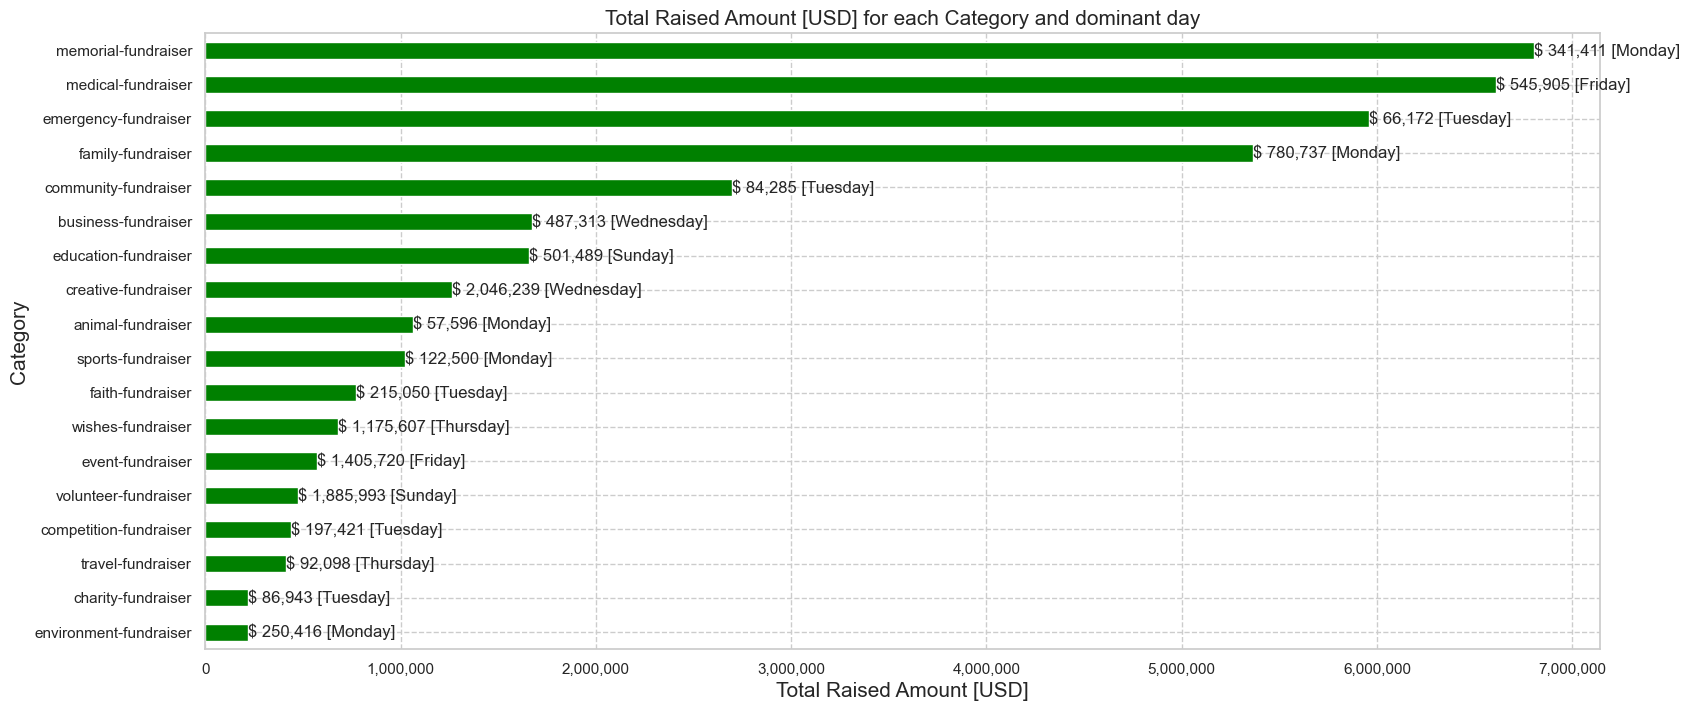

In [85]:
category_amount = clean_data.groupby('category')['raised_amount'].sum().\
    sort_values(ascending=False).reset_index().\
    rename(columns={'raised_amount':'total_raised_amount'})

top_day    = clean_data.groupby(['category', 'day_of_week'])['raised_amount'].sum()\
    .reset_index().sort_values('raised_amount', ascending=False)\
    .groupby('category').first().reset_index()

result = pd.merge(category_amount, top_day, on='category', how='right')[top_day.columns]
result.set_index('category').reindex(index=['category']).reset_index()


# Plot the total raised amount for each category
plt.figure(figsize=(18, 8))
ax = category_amount.plot(kind='barh', x='category', y='total_raised_amount', color='green', legend=False, ax=plt.gca())

# Add the dominant state as a label next to the raised amount
for i, container in enumerate(ax.containers):
    # Custom labels that include both raised amount and dominant day
    labels = [f"$ {int(result.loc[i, 'raised_amount']):,} [{result.loc[i, 'day_of_week']}]" for i in range(len(result))]
    ax.bar_label(container, labels=labels, fontsize=12)

# Add labels and title
plt.xlabel('Total Raised Amount [USD]', fontsize=15)
plt.ylabel('Category', fontsize=15)
plt.title('Total Raised Amount [USD] for each Category and dominant day', fontsize=15)

# Format the x-axis to show commas instead of scientific notation
formatter = mticker.FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

# Invert the y-axis to have the highest value at the top
plt.gca().invert_yaxis()

# Add a grid
plt.grid(True, linestyle='--')

# Show the plot
plt.show()

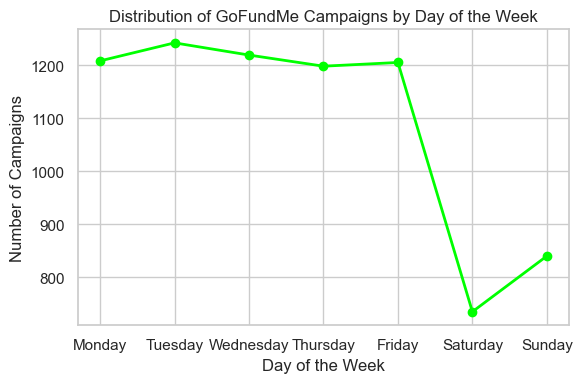

In [94]:

campaign_distribution_by_day = clean_data.groupby('day_of_week').size()

# Reorder the days of the week to start from Monday to Sunday
campaign_distribution_by_day = campaign_distribution_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Step 4: Plot the distribution of campaigns by day of the week using a line chart
plt.figure(figsize=(6,4))
campaign_distribution_by_day.plot(kind='line', color='lime', marker='o', linestyle='-', linewidth=2)

# Add titles and labels
plt.title('Distribution of GoFundMe Campaigns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Campaigns')

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/58/qls5d_113ljg2vhyv3zqrjp80000gn/T/ipykernel_7838/2454269222.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['goal_category'] = pd.cut(filtered_data['goal_amount'], bins=[0, 50000, 100000, 150000, 200000],
/var/folders/58/qls5d_113ljg2vhyv3zqrjp80000gn/T/ipykernel_7838/2454269222.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['duration_category'] = pd.cut(filtered_data['campaign_duration'],


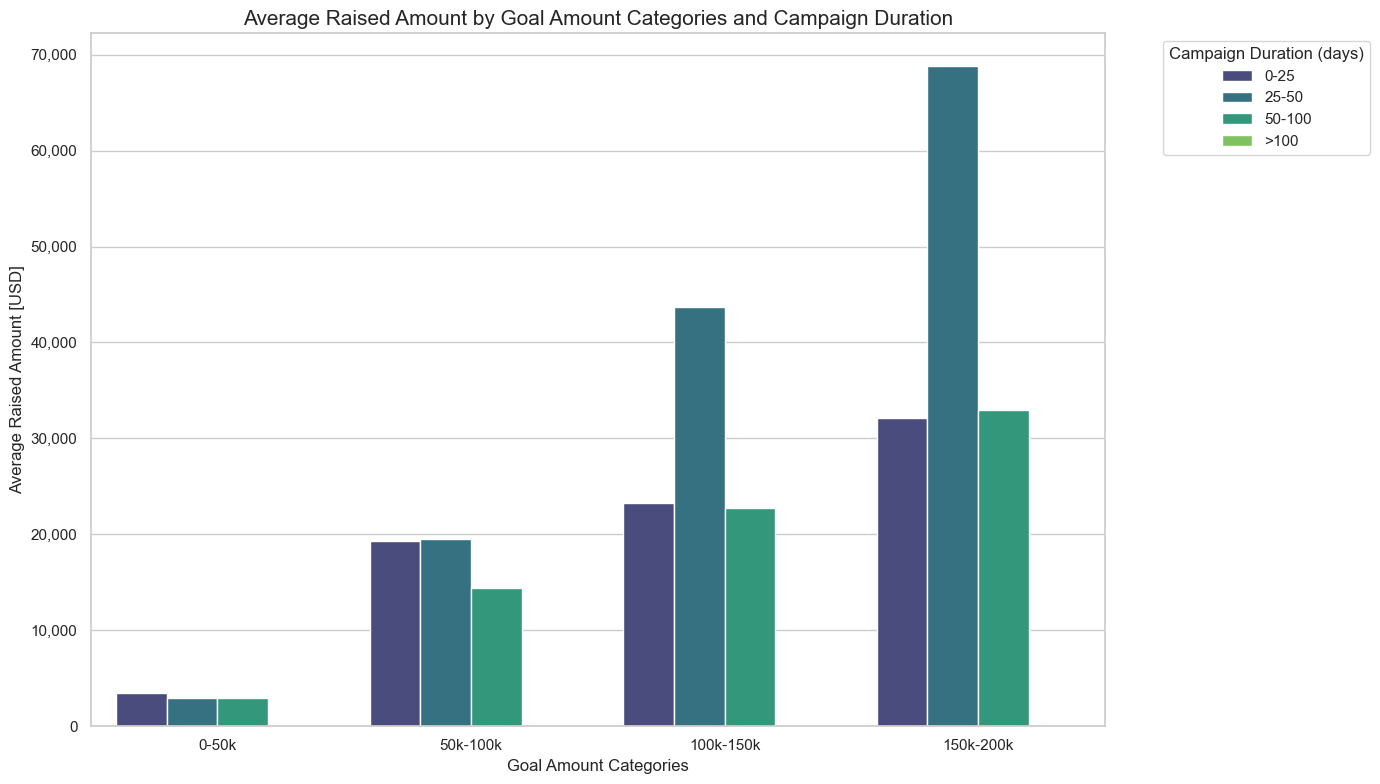

In [93]:

# Filter the data based on the specified ranges
filtered_data = clean_data[
    (clean_data['raised_amount'].between(0, 200000)) &
    (clean_data['goal_amount'].between(0, 200000)) &
    (clean_data['campaign_duration'].between(0, 100))
]

# Create a new column to categorize goal amounts for better visualization
filtered_data['goal_category'] = pd.cut(filtered_data['goal_amount'], bins=[0, 50000, 100000, 150000, 200000],
                                         labels=['0-50k', '50k-100k', '100k-150k', '150k-200k'])

# Create bins for campaign duration
filtered_data['duration_category'] = pd.cut(filtered_data['campaign_duration'], 
                                             bins=[0, 25, 50, 100, float('inf')],
                                             labels=['0-25', '25-50', '50-100', '>100'])

# Calculate the average raised amount for each goal category and campaign duration
bar_data = filtered_data.groupby(['goal_category', 'duration_category'])['raised_amount'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=bar_data, x='goal_category', y='raised_amount', hue='duration_category', 
            palette='viridis', ci=None)

# Add labels and title
plt.title('Average Raised Amount by Goal Amount Categories and Campaign Duration', fontsize=15)
plt.xlabel('Goal Amount Categories', fontsize=12)
plt.ylabel('Average Raised Amount [USD]', fontsize=12)
plt.legend(title='Campaign Duration (days)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format the y-axis to show commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y):,}'))

# Show the plot
plt.tight_layout()
plt.show()



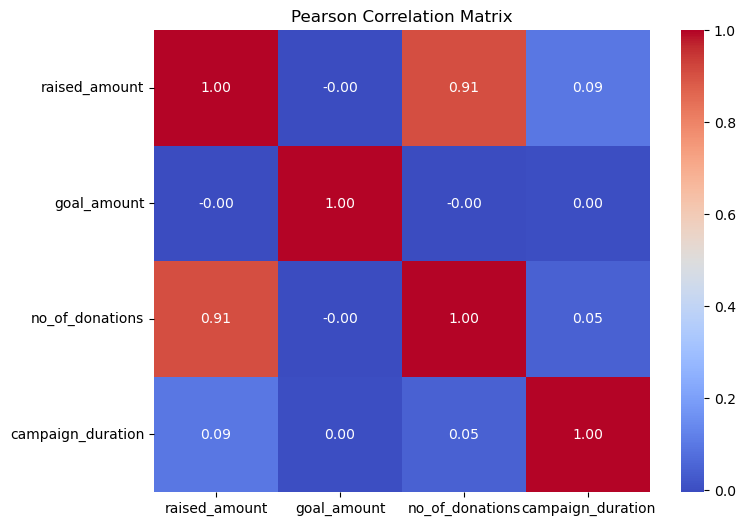

In [77]:


# Calculate the correlation matrix
corr_matrix = clean_data.corr(method='pearson')

# Plot the correlation matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Pearson Correlation Matrix")
plt.show()


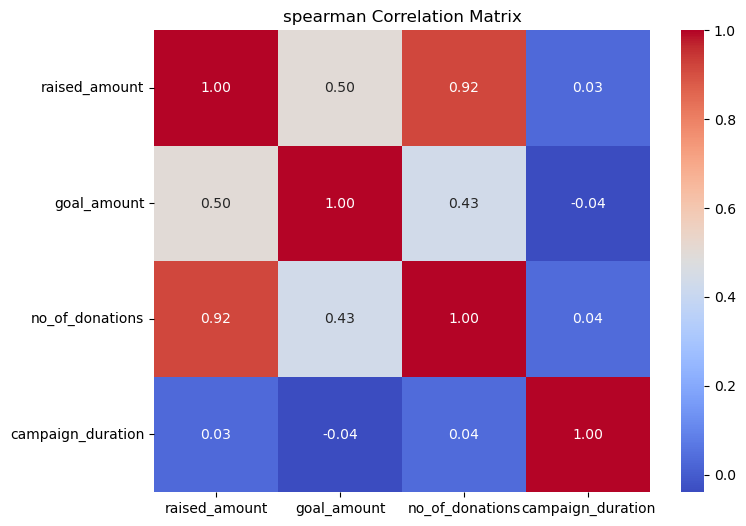

In [78]:
# Calculate the correlation matrix
corr_matrix = clean_data.corr(method='spearman')

# Plot the correlation matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("spearman Correlation Matrix")
plt.show()


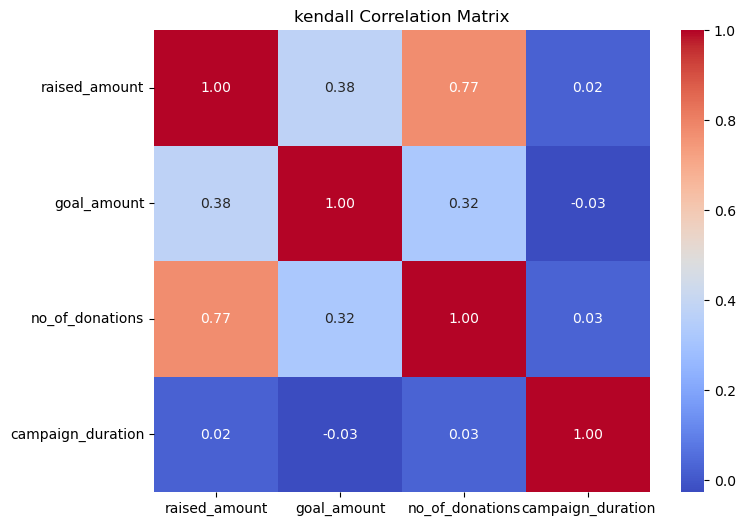

In [79]:
# Calculate the correlation matrix
corr_matrix = clean_data.corr(method='kendall')

# Plot the correlation matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("kendall Correlation Matrix")
plt.show()
